In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [28]:
df.shape

(400, 26)

In [29]:
df.drop('id', axis = 1, inplace = True)

In [30]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
print(df.columns)

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')


In [31]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

Data Cleaning

In [46]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors = 'coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors = 'coerce')

df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors = 'coerce')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

Handling Missing Values

In [48]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
num_cols = [col for col in df.columns if df[col].dtype != "object"]

In [49]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [50]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [51]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values 

appetite has ['good' 'poor' nan] values 

peda_edema has ['no' 'yes' nan] values 

aanemia has ['no' 'yes' nan] values 

class has ['ckd' 'ckd\t' 'notckd'] values 



In [52]:
#replace unwanted values

# Diabetes mellitus
df['diabetes_mellitus'].replace(to_replace={' yes': 'yes', '\tyes': 'yes', '\tno': 'no', np.nan: 'unknown'}, inplace=True)
df['diabetes_mellitus'].unique()

# Coronary artery disease
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value = 'no')
df['coronary_artery_disease'].unique()

# Class (fixing inconsistencies like trailing tabs)
df['class'] = df['class'].replace(to_replace = 'ckd\t', value = 'ckd')
df['class'].unique()
df['class'] = df['class'].map({'ckd': 0, 'notckd': 1})
df['class'].unique()


array([0, 1])

In [53]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' 'unknown'] values 

coronary_artery_disease has ['no' 'yes' nan] values 

appetite has ['good' 'poor' nan] values 

peda_edema has ['no' 'yes' nan] values 

aanemia has ['no' 'yes' nan] values 

class has [0 1] values 



Feature Engineering

In [54]:
# Binarize categorical variables (if 'Yes'/'No' is used)
df['hypertension'] = df['hypertension'].apply(lambda x: 1 if x == 'Yes' else 0)
df['diabetes_mellitus'] = df['diabetes_mellitus'].apply(lambda x: 1 if x == 'Yes' else 0)
df['coronary_artery_disease'] = df['coronary_artery_disease'].apply(lambda x: 1 if x == 'Yes' else 0)
df['peda_edema'] = df['peda_edema'].apply(lambda x: 1 if x == 'Yes' else 0)
df['aanemia'] = df['aanemia'].apply(lambda x: 1 if x == 'Yes' else 0)



Univariate Analysis

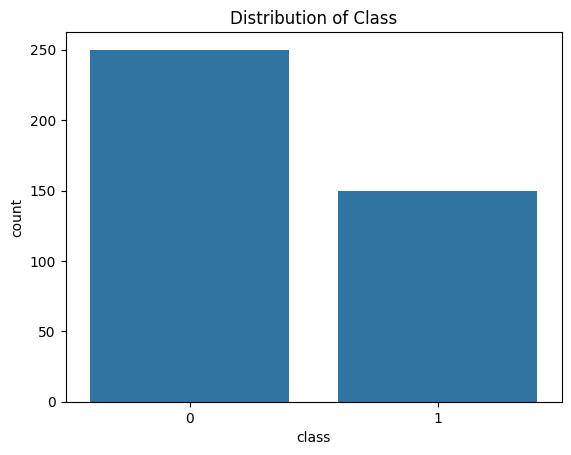

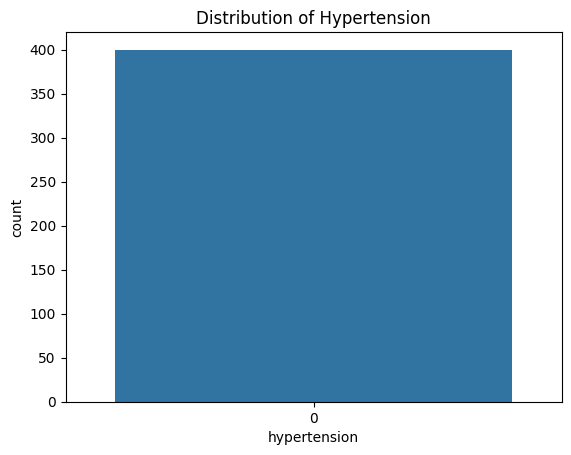

In [55]:
# Categorical Variables

import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for 'class' column
sns.countplot(x='class', data=df)
plt.title('Distribution of Class')
plt.show()

# Count plot for binary categorical columns
sns.countplot(x='hypertension', data=df)
plt.title('Distribution of Hypertension')
plt.show()


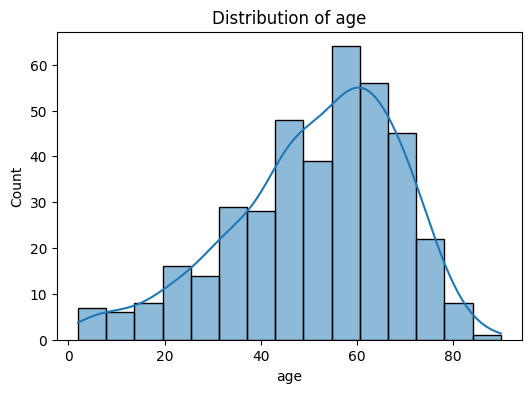

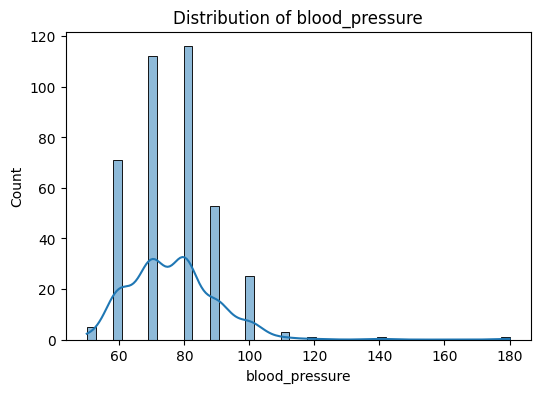

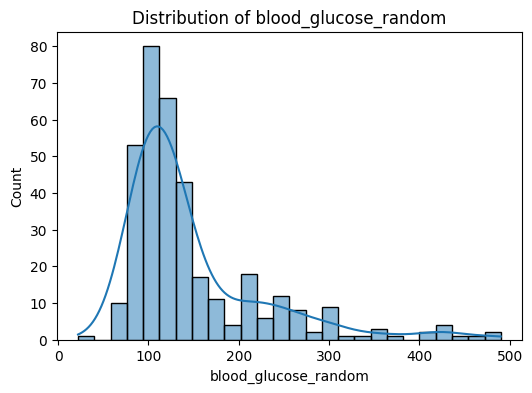

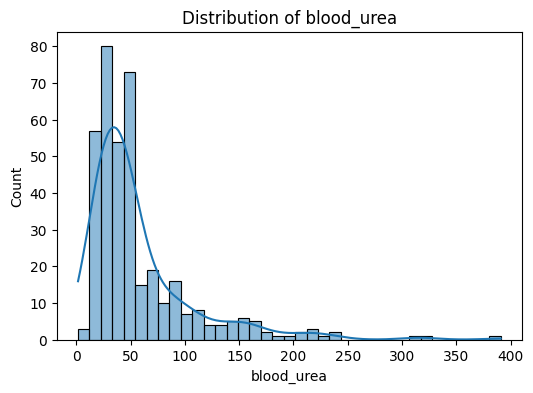

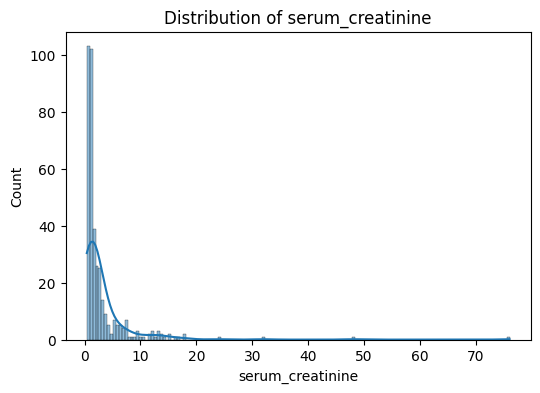

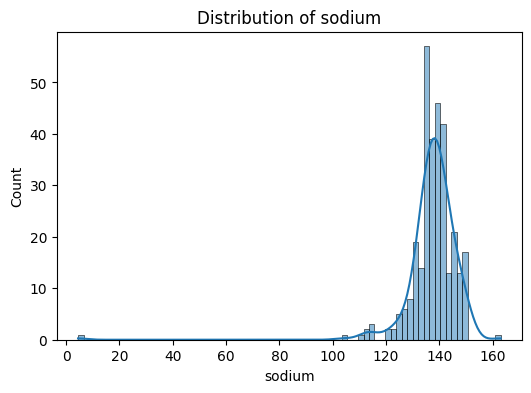

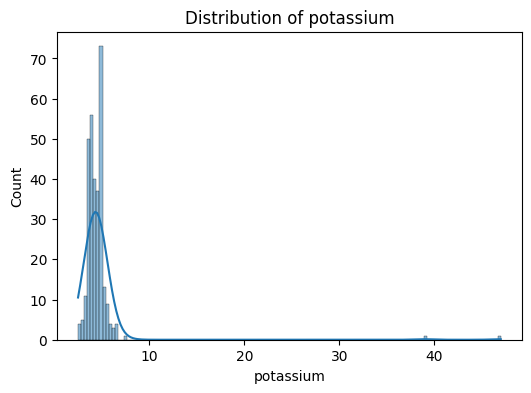

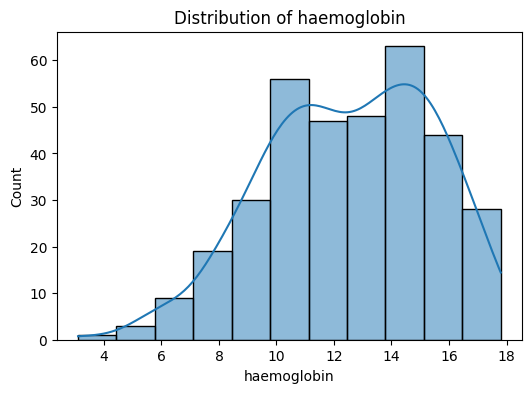

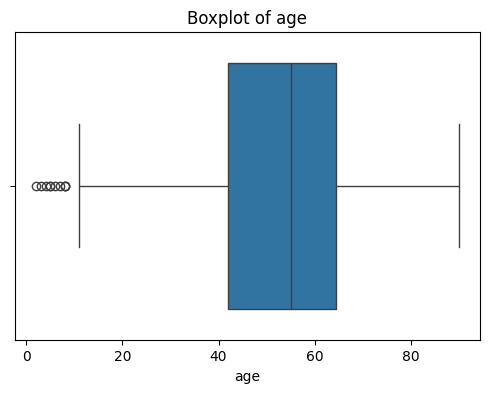

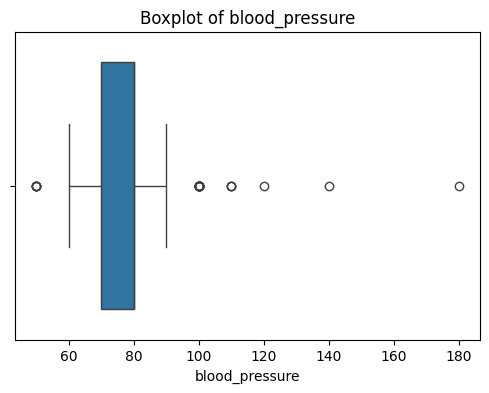

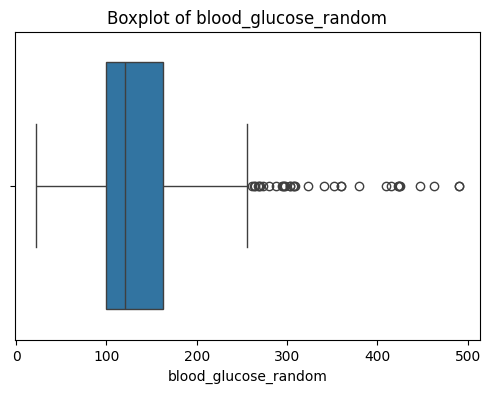

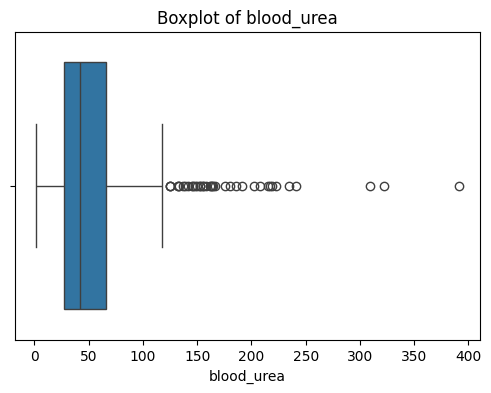

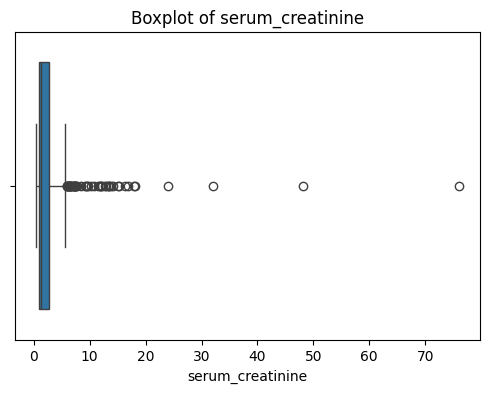

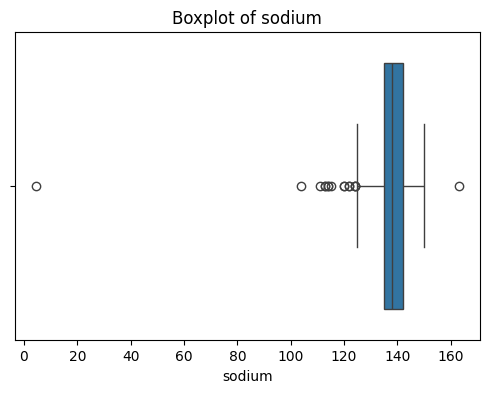

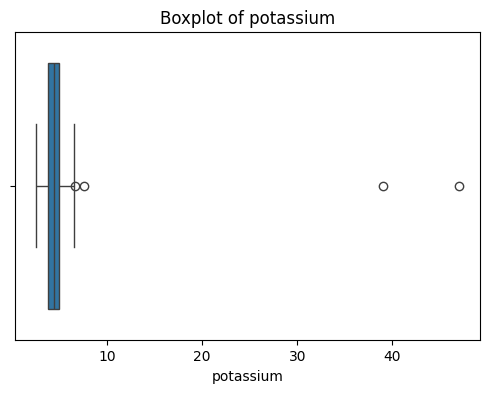

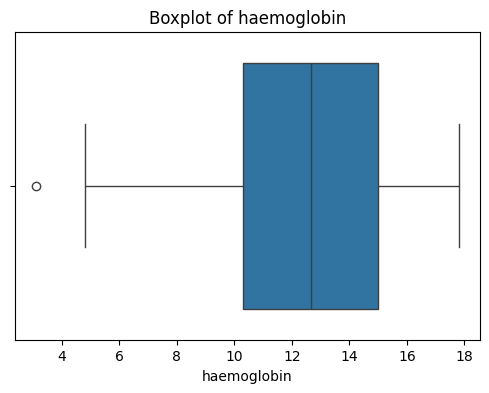

In [56]:
#  Numerical Variables

# Plot the distribution of numerical columns
numerical_columns = ['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin']

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Box plots for outlier detection in numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Bivariate Analysis

class           0    1
hypertension          
0             250  150


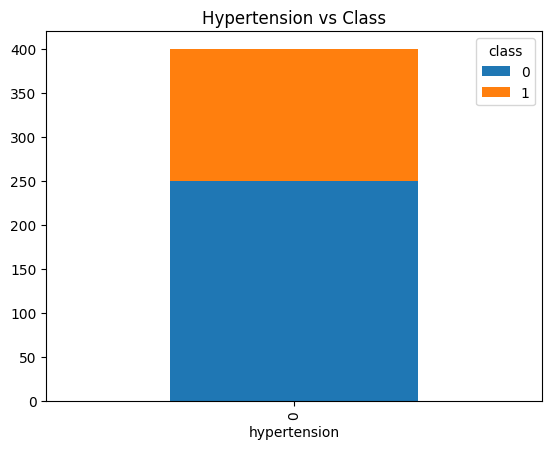

In [57]:
# Categorical vs Categorical

# Cross-tabulation for hypertension and class
cross_tab = pd.crosstab(df['hypertension'], df['class'])
print(cross_tab)

# Stacked bar plot for hypertension vs class
cross_tab.plot(kind='bar', stacked=True)
plt.title('Hypertension vs Class')
plt.show()


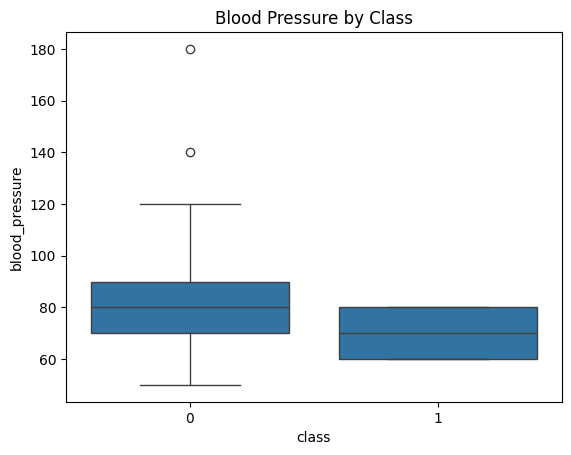

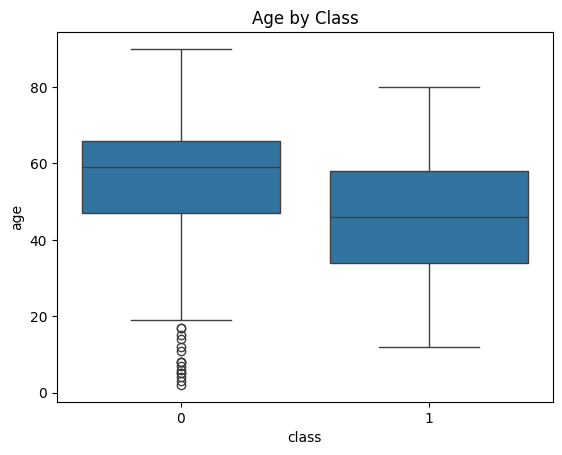

In [58]:
#  Categorical vs Numerical

# Box plot for blood_pressure by class
sns.boxplot(x='class', y='blood_pressure', data=df)
plt.title('Blood Pressure by Class')
plt.show()

# Box plot for age by class
sns.boxplot(x='class', y='age', data=df)
plt.title('Age by Class')
plt.show()


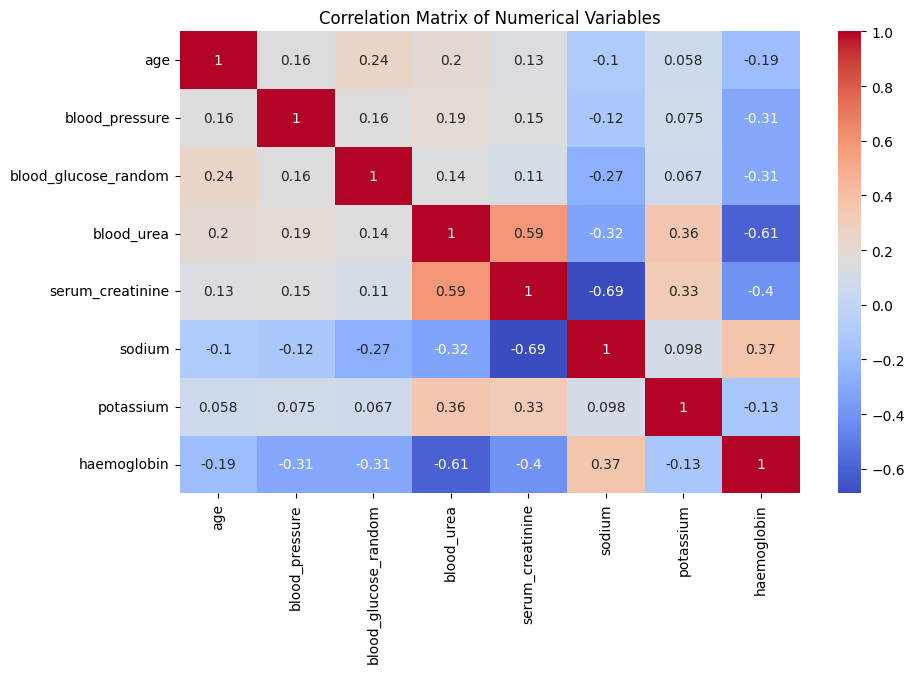

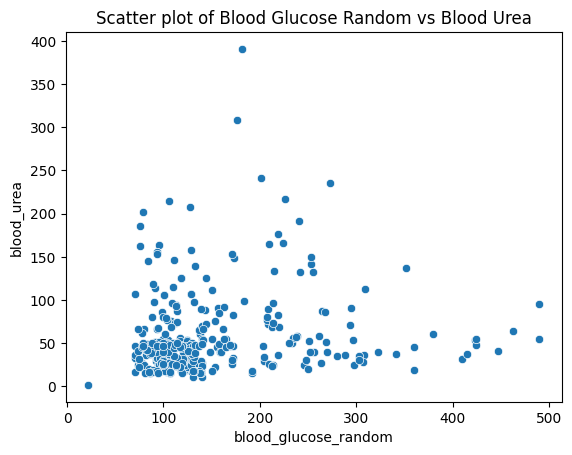

In [59]:
# Numerical vs Numerical

# Correlation matrix for numerical variables
corr = df[numerical_columns].corr()

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Scatter plot for blood_glucose_random vs blood_urea
sns.scatterplot(x='blood_glucose_random', y='blood_urea', data=df)
plt.title('Scatter plot of Blood Glucose Random vs Blood Urea')
plt.show()


 Multivariate Analysis

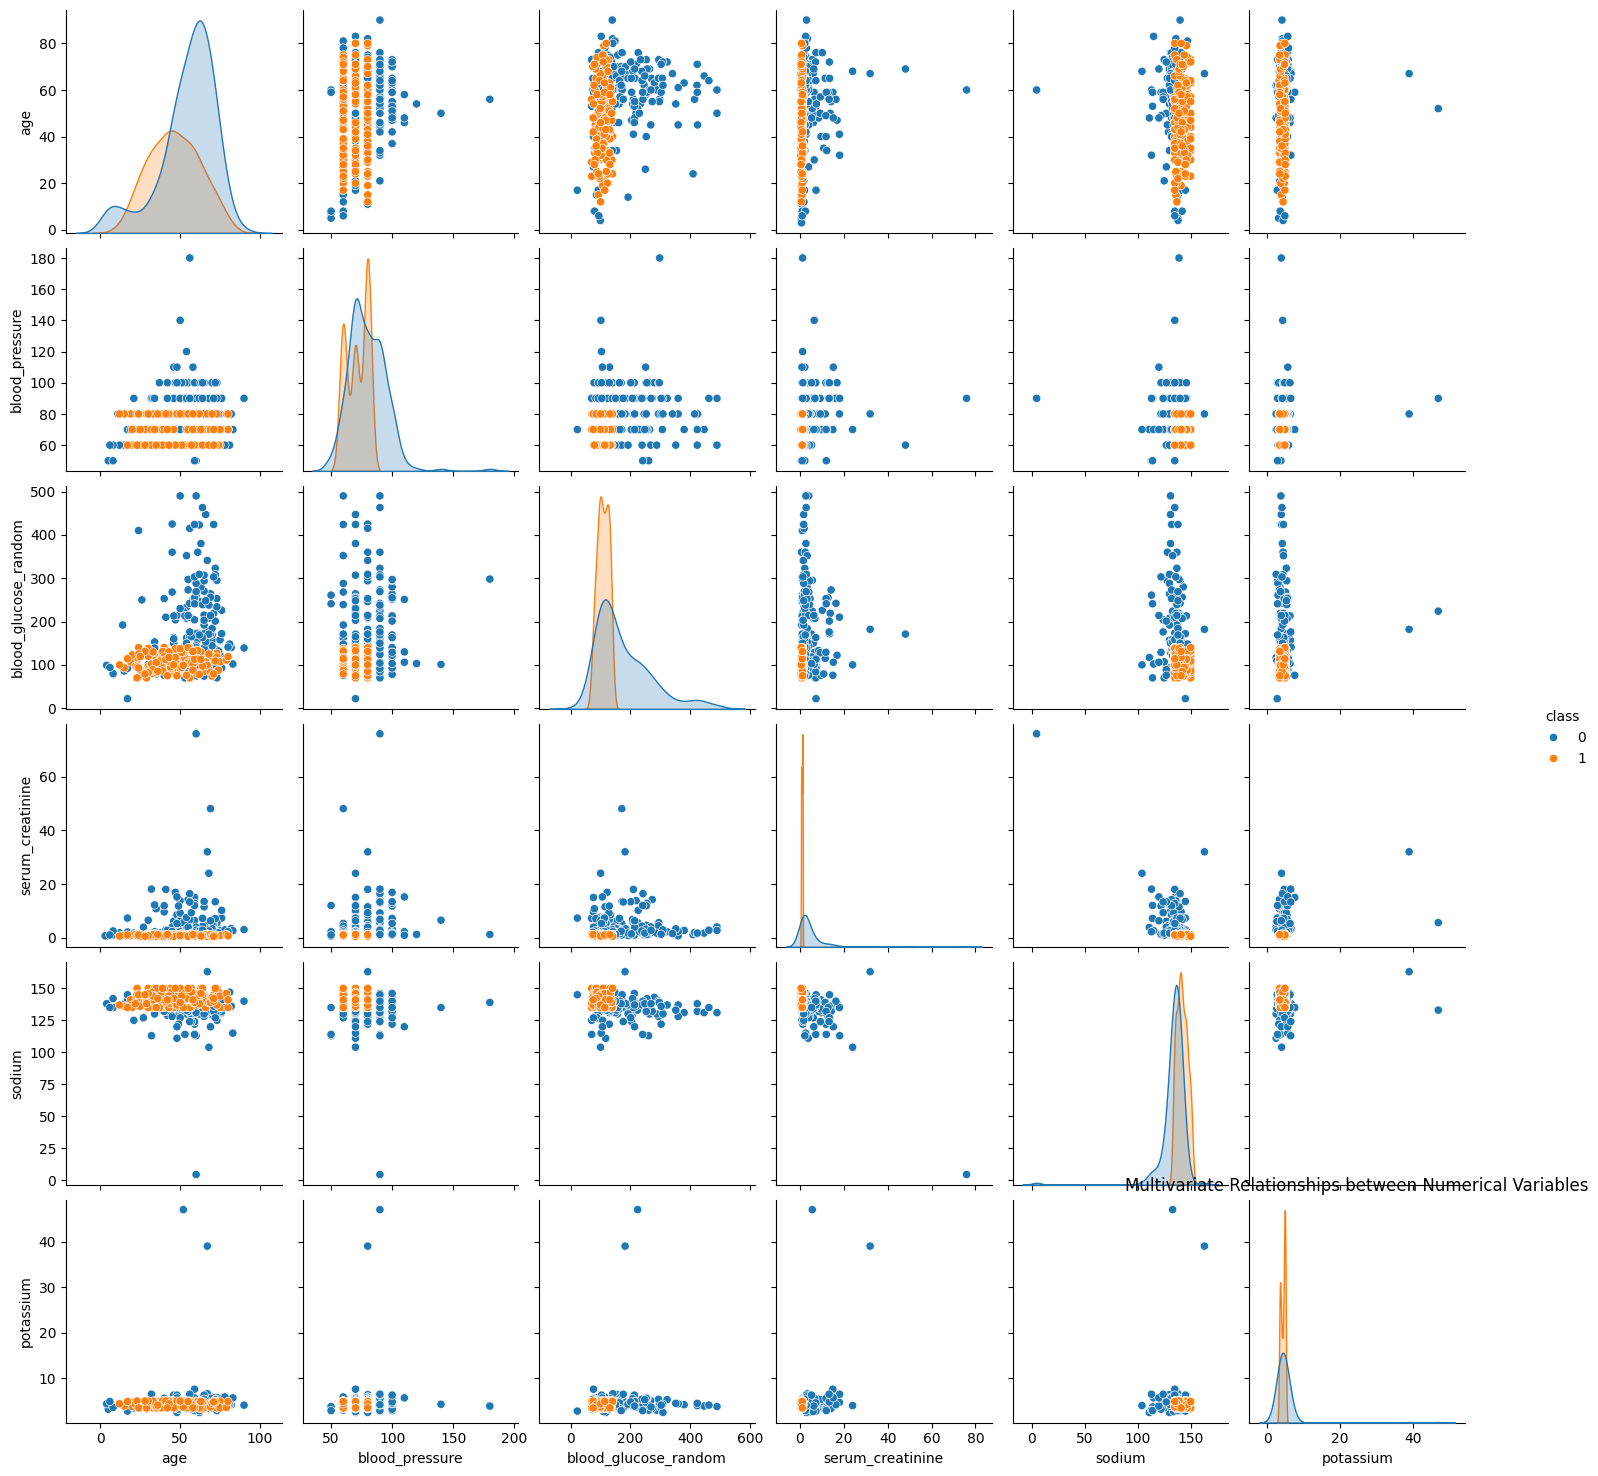

In [60]:
# Pairplot for selected numerical and categorical columns
selected_columns = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'sodium', 'potassium', 'class']
sns.pairplot(df[selected_columns], hue='class')
plt.title('Multivariate Relationships between Numerical Variables')
plt.show()


Outlier Detection

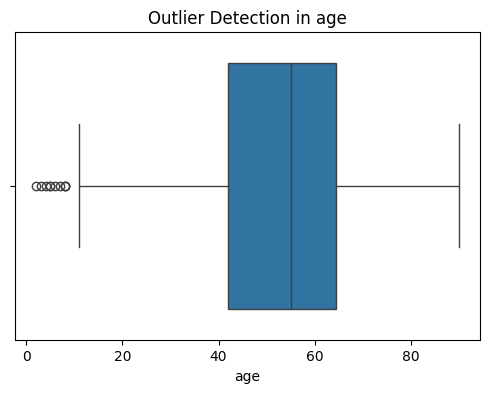

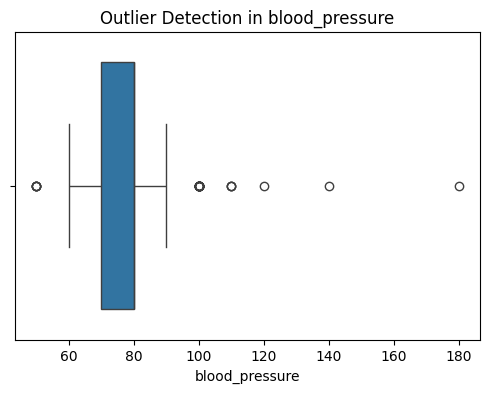

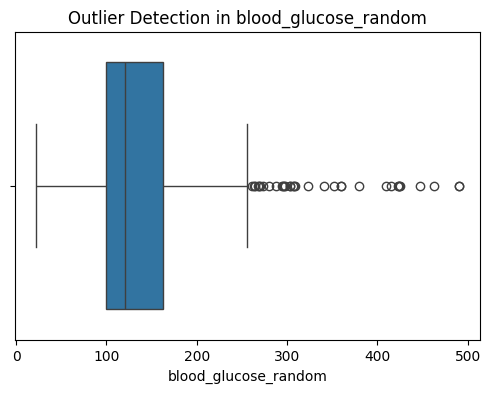

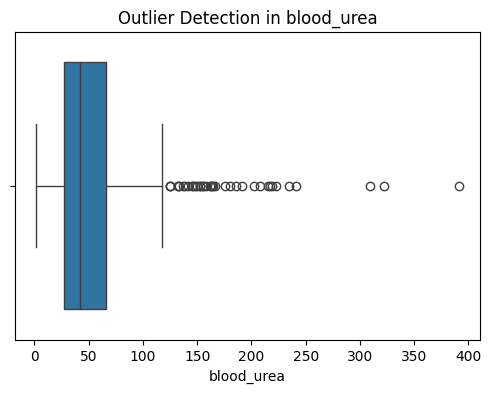

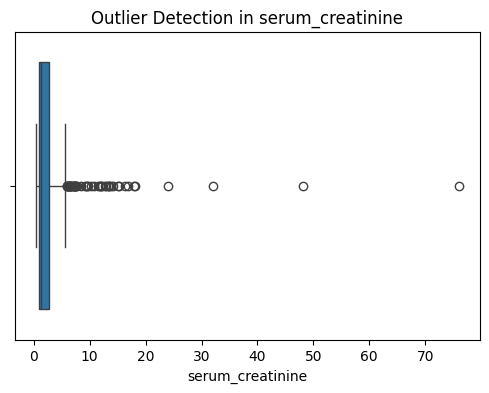

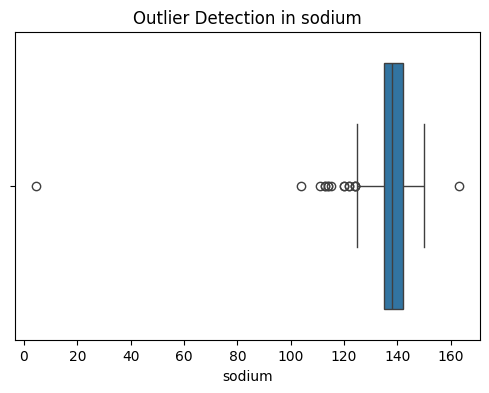

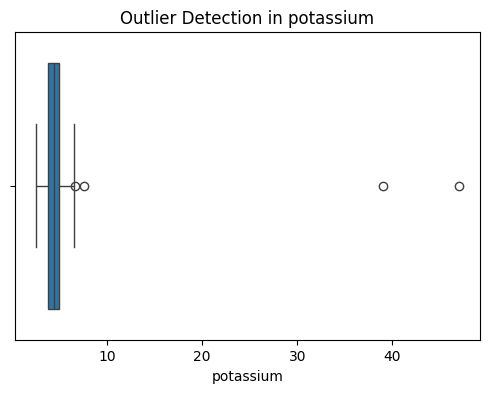

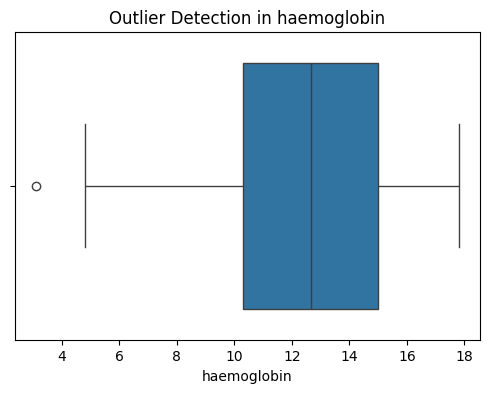

In [61]:
# Detecting outliers using box plots for key numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Detection in {col}')
    plt.show()


### Final Insights and Summary

Age and Health Conditions : Age vs. Blood Pressure, Hypertension, and Diabetes Mellitus: Investigate if older patients are more prone to conditions like high blood pressure, hypertension, and diabetes.

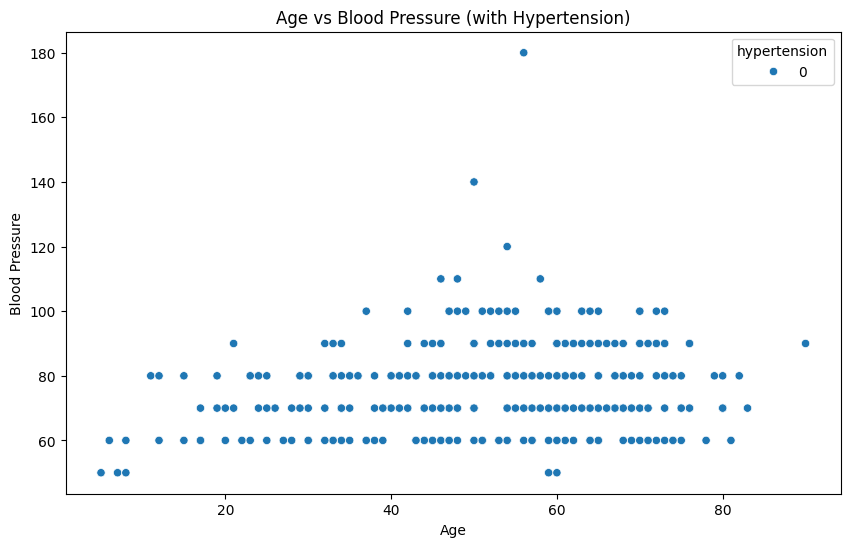

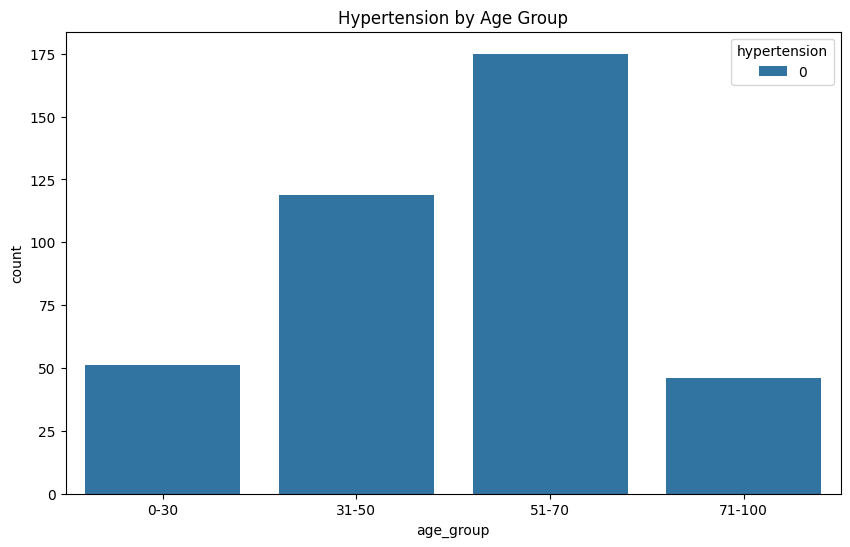

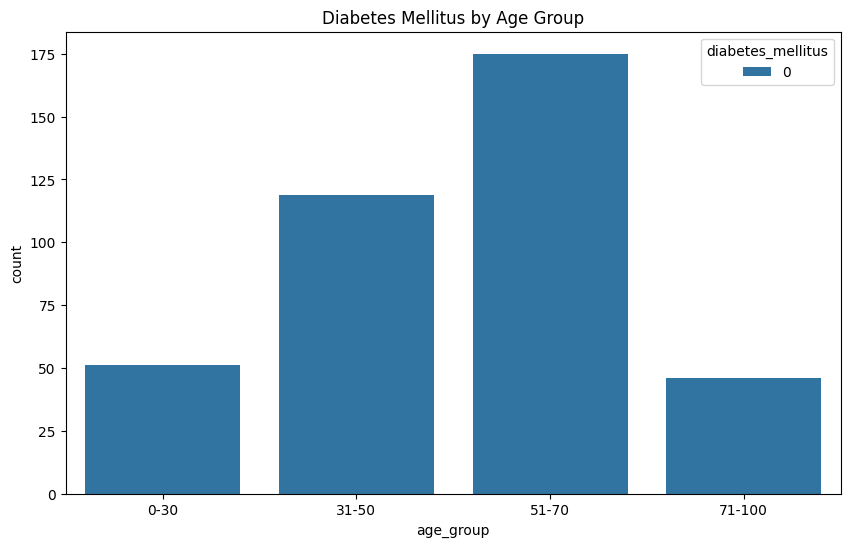

In [62]:
# Scatter plot of Age vs Blood Pressure
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='blood_pressure', hue='hypertension', data=df)
plt.title('Age vs Blood Pressure (with Hypertension)')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

# Countplot of Hypertension and Diabetes Mellitus by Age Group
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 100], labels=['0-30', '31-50', '51-70', '71-100'])
plt.figure(figsize=(10,6))
sns.countplot(x='age_group', hue='hypertension', data=df)
plt.title('Hypertension by Age Group')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='age_group', hue='diabetes_mellitus', data=df)
plt.title('Diabetes Mellitus by Age Group')
plt.show()

Kidney Function and Disease : Serum Creatinine and Blood Urea Levels vs Class: Analyze how kidney function indicators like serum_creatinine and blood_urea vary with the health class.

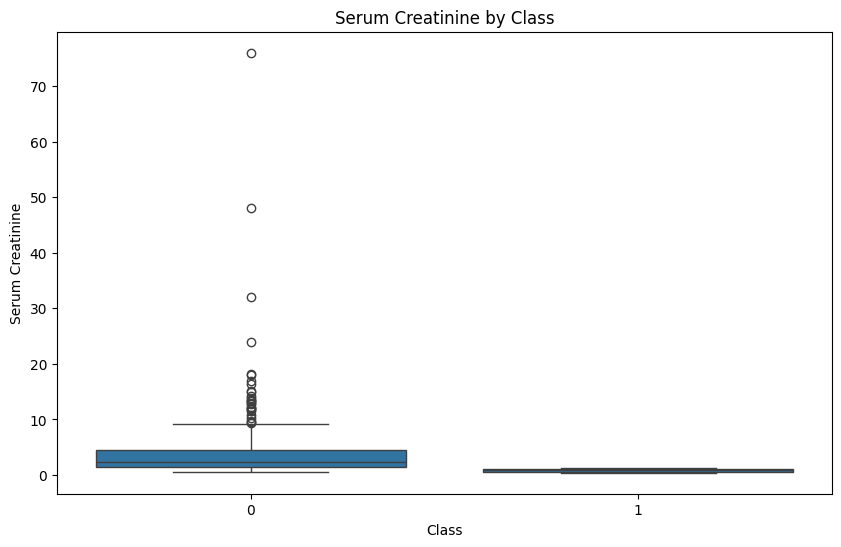

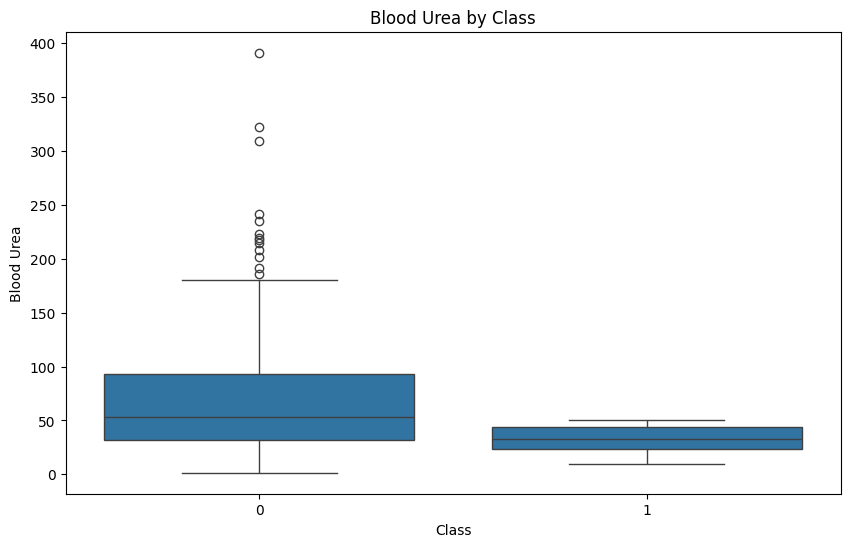

In [63]:
# Boxplot for Serum Creatinine by Class
plt.figure(figsize=(10,6))
sns.boxplot(x='class', y='serum_creatinine', data=df)
plt.title('Serum Creatinine by Class')
plt.xlabel('Class')
plt.ylabel('Serum Creatinine')
plt.show()

# Boxplot for Blood Urea by Class
plt.figure(figsize=(10,6))
sns.boxplot(x='class', y='blood_urea', data=df)
plt.title('Blood Urea by Class')
plt.xlabel('Class')
plt.ylabel('Blood Urea')
plt.show()


Blood Glucose and Diabetes Mellitus : Blood Glucose Random vs Diabetes Mellitus: Investigate if higher random blood glucose levels are more common in patients with diabetes.

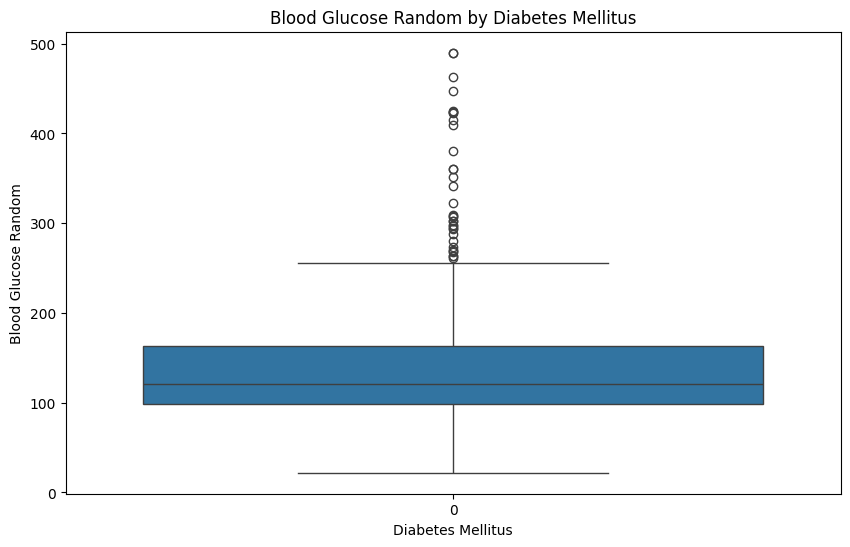

In [64]:
# Boxplot of Blood Glucose Random by Diabetes Mellitus
plt.figure(figsize=(10,6))
sns.boxplot(x='diabetes_mellitus', y='blood_glucose_random', data=df)
plt.title('Blood Glucose Random by Diabetes Mellitus')
plt.xlabel('Diabetes Mellitus')
plt.ylabel('Blood Glucose Random')
plt.show()


Correlation Analysis : Correlation Between Key Variables: Perform correlation analysis to identify significant relationships between variables like blood pressure, serum creatinine, potassium, and others.

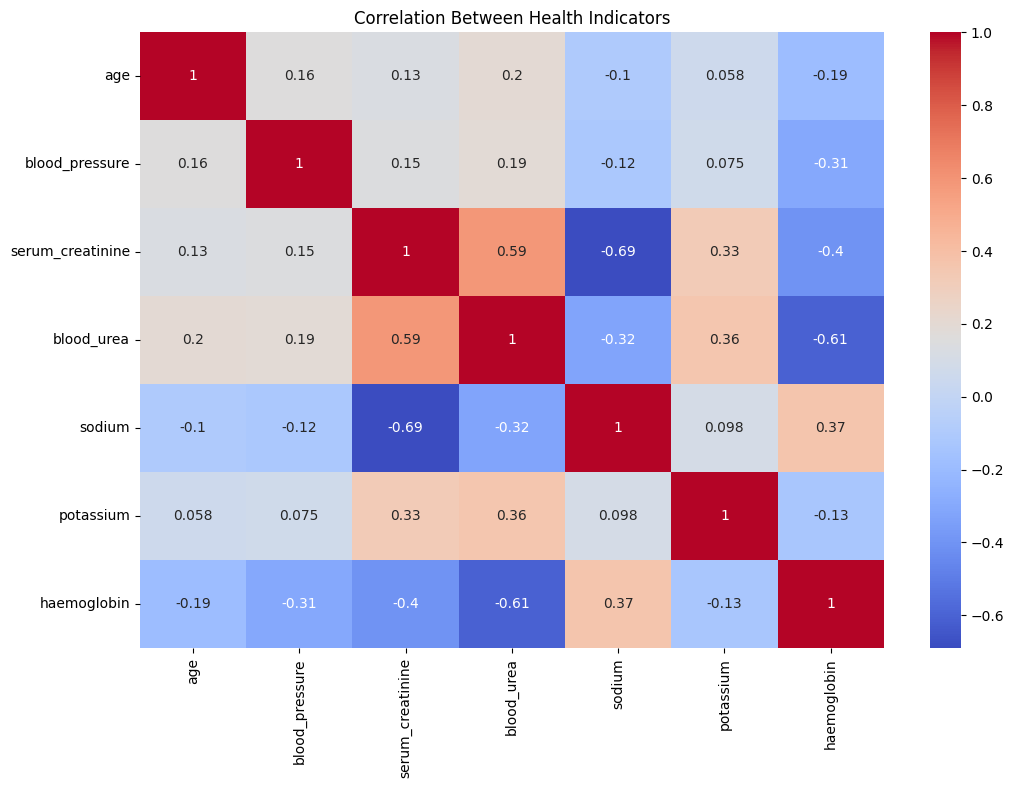

In [65]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[['age', 'blood_pressure', 'serum_creatinine', 'blood_urea', 'sodium', 'potassium', 'haemoglobin']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Health Indicators')
plt.show()


Anemia and Haemoglobin : Haemoglobin Levels vs Anemia: Explore the relationship between haemoglobin levels and aanemia to confirm if low haemoglobin correlates with anemia.

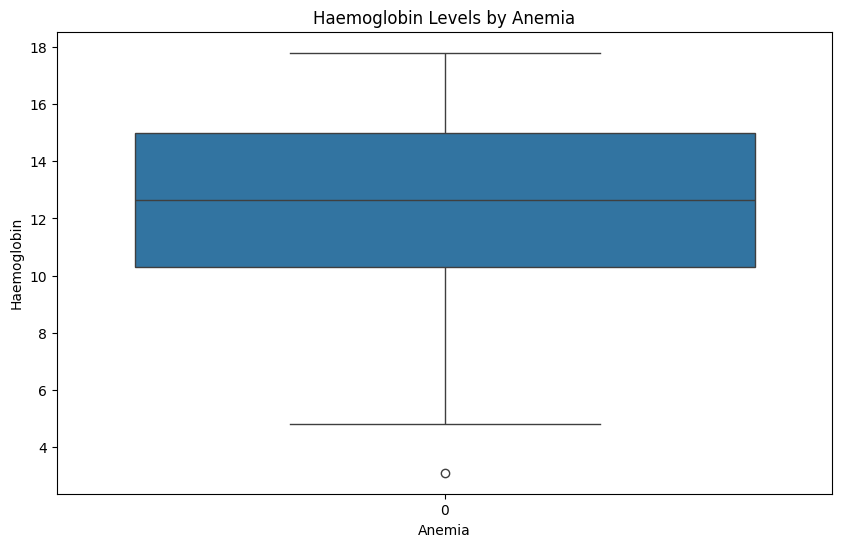

In [70]:
# Boxplot of Haemoglobin by Anemia
plt.figure(figsize=(10,6))
sns.boxplot(x='aanemia', y='haemoglobin', data=df)
plt.title('Haemoglobin Levels by Anemia')
plt.xlabel('Anemia')
plt.ylabel('Haemoglobin')
plt.show()


Pus Cells and Kidney Health : Pus Cells and Serum Creatinine/Blood Urea Levels: Investigate the relationship between the presence of pus cells and kidney health indicators such as serum_creatinine and blood_urea.

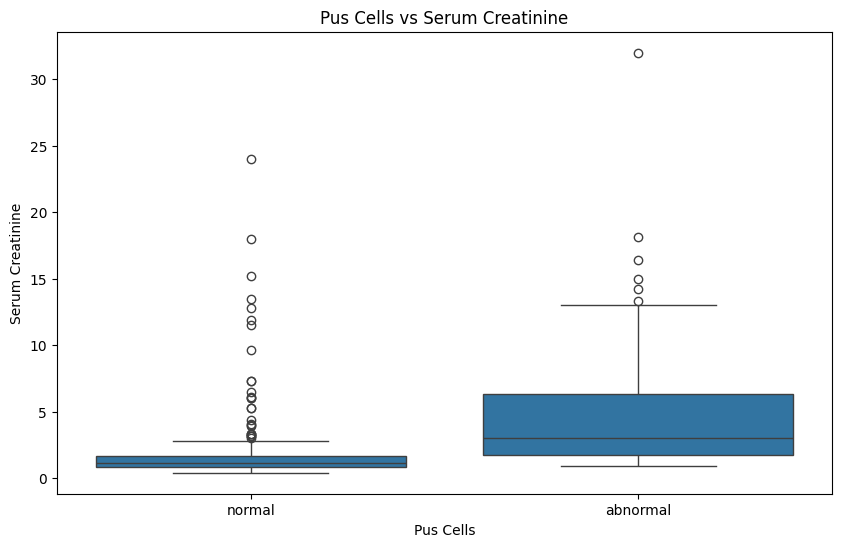

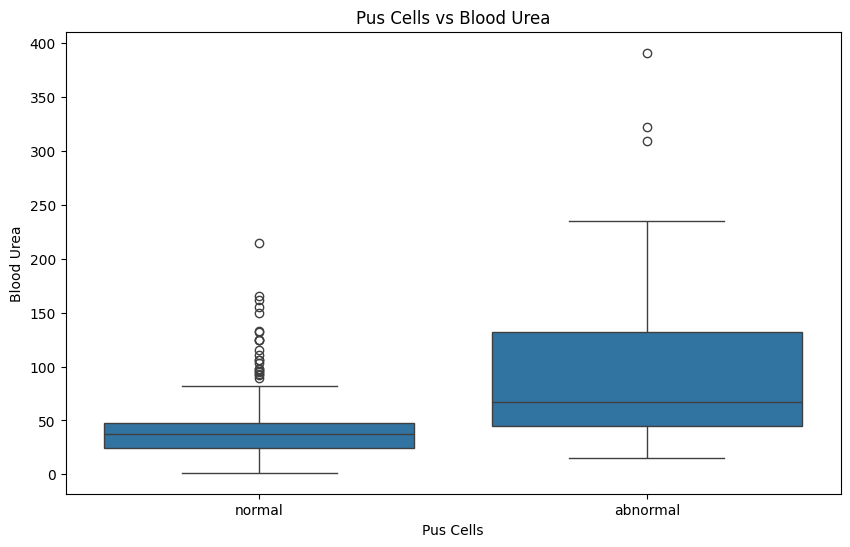

In [71]:
# Boxplot for Pus Cells vs Serum Creatinine
plt.figure(figsize=(10,6))
sns.boxplot(x='pus_cell', y='serum_creatinine', data=df)
plt.title('Pus Cells vs Serum Creatinine')
plt.xlabel('Pus Cells')
plt.ylabel('Serum Creatinine')
plt.show()

# Boxplot for Pus Cells vs Blood Urea
plt.figure(figsize=(10,6))
sns.boxplot(x='pus_cell', y='blood_urea', data=df)
plt.title('Pus Cells vs Blood Urea')
plt.xlabel('Pus Cells')
plt.ylabel('Blood Urea')
plt.show()


Specific Gravity and Kidney Health : Specific Gravity vs Albumin and Sugar: Check if variations in specific_gravity are associated with the presence of albumin and sugar, indicators of kidney dysfunction.

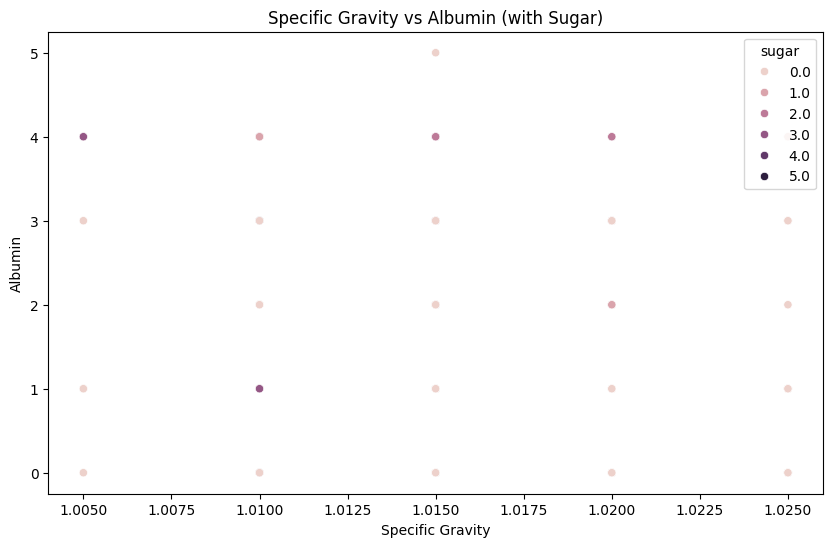

In [68]:
# Scatter plot for Specific Gravity vs Albumin and Sugar
plt.figure(figsize=(10,6))
sns.scatterplot(x='specific_gravity', y='albumin', hue='sugar', data=df)
plt.title('Specific Gravity vs Albumin (with Sugar)')
plt.xlabel('Specific Gravity')
plt.ylabel('Albumin')
plt.show()


Electrolyte Balance : Sodium and Potassium Levels: Analyze the balance of electrolytes (sodium, potassium) and how they vary with different health conditions (e.g., class, hypertension).

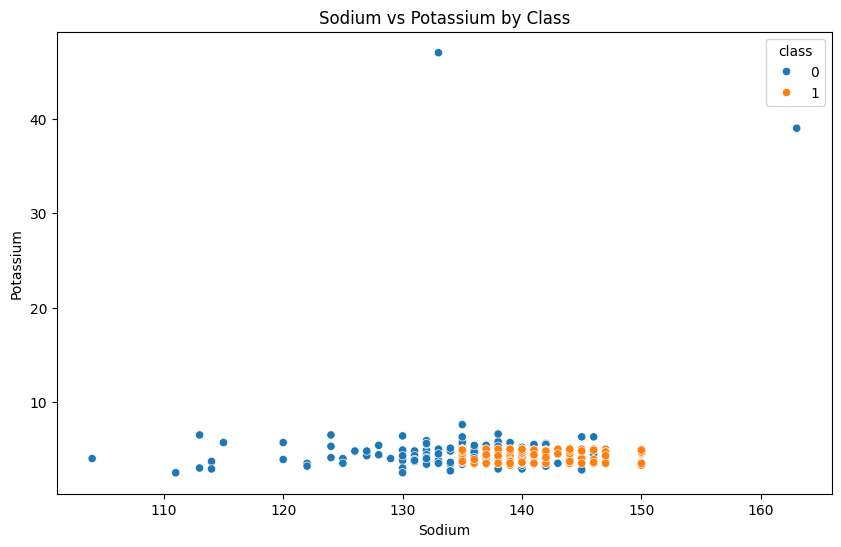

In [69]:
# Scatter plot of Sodium vs Potassium with Class
plt.figure(figsize=(10,6))
sns.scatterplot(x='sodium', y='potassium', hue='class', data=df)
plt.title('Sodium vs Potassium by Class')
plt.xlabel('Sodium')
plt.ylabel('Potassium')
plt.show()
